In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv
etf_df = pd.read_csv('csv_files/ETF_percent_change.csv')
etf_df.head()

,Date,ETF,Average High,High (Percent Change),Average Volume,Volume (Percent Change)
0,2018-04,DRIV,14.277172,0.000000,100540.000000,0.000000
1,2018-05,DRIV,14.468911,-0.728209,12881.818182,-17.324042
2,2018-06,DRIV,14.496056,0.785550,10276.190476,-6.713115
3,2018-07,DRIV,14.054823,-1.254754,4919.047619,-2.277108
4,2018-08,DRIV,13.981378,0.595460,3739.130435,-15.851351


In [3]:
oil_df = pd.read_csv('csv_files/oil_percent_change.csv')
oil_df.head()

,Date,Average Price of Oil,Price of Oil (Percent Change)
0,2003-01,30.336364,0.000000
1,2003-02,31.643500,1.250407
2,2003-03,29.440000,-3.481765
3,2003-04,25.239048,-2.700220
4,2003-05,25.629545,2.773187


In [4]:
# merge dataframes
merged_df = pd.merge(etf_df, oil_df, on='Date', how='inner')
merged_df

,Date,ETF,Average High,High (Percent Change),Average Volume,Volume (Percent Change),Average Price of Oil,Price of Oil (Percent Change)
0,2018-04,DRIV,14.277172,0.000000,1.005400e+05,0.000000,68.427143,1.641870
1,2018-04,HAIL,27.923829,-0.325238,1.447619e+03,336.000000,68.427143,1.641870
2,2018-04,KARS,21.283952,-0.545344,9.642857e+03,-12.264706,68.427143,1.641870
3,2018-04,LIT,31.599762,-0.879323,3.329381e+05,-11.326916,68.427143,1.641870
4,2018-05,DRIV,14.468911,-0.728209,1.288182e+04,-17.324042,74.113043,1.347226
...,...,...,...,...,...,...,...,...
363,2017-07,LIT,27.854135,-0.527545,1.545950e+05,3.576159,46.931429,1.997370
364,2017-08,LIT,29.800439,1.530177,2.585261e+05,24.421348,49.601739,-0.280768
365,2017-09,LIT,33.829563,2.083601,1.082070e+06,66.512262,53.436190,2.484603
366,2017-10,LIT,36.126707,2.267909,8.457773e+05,14.596220,55.501818,1.327174


In [5]:
# to csv
merged_df.to_csv('csv_files/etf_oil.csv', encoding='utf-8', index=False)

In [6]:
# make data frame for dates from 2020 and up
reduced_df = merged_df.loc[merged_df['Date'] >= '2020-01']
reduced_df

,Date,ETF,Average High,High (Percent Change),Average Volume,Volume (Percent Change),Average Price of Oil,Price of Oil (Percent Change)
93,2020-01,DRIV,15.022696,1.460836,21657.142857,55.239130,65.103182,-2.919953
94,2020-01,IDRV,27.046991,1.335631,7128.571429,29.647059,65.103182,-2.919953
95,2020-01,HAIL,30.153096,1.474724,3171.428571,217.000000,65.103182,-2.919953
96,2020-01,KARS,23.086215,2.113854,11604.761905,13.125000,65.103182,-2.919953
97,2020-01,LIT,28.653180,1.884612,217395.238095,-4.847187,65.103182,-2.919953
...,...,...,...,...,...,...,...,...
263,2022-07,IDRV,38.482250,-2.550091,61335.000000,-14.751553,108.603333,-0.853806
264,2022-07,HAIL,37.065600,-2.852907,8760.000000,15.714286,108.603333,-0.853806
265,2022-07,KARS,35.935800,-0.976138,40550.000000,-12.731768,108.603333,-0.853806
266,2022-07,LIT,72.796500,-0.455012,523645.000000,-8.363723,108.603333,-0.853806


In [7]:
# make data frames for each ETF from reduced Dataframe
driv = reduced_df.loc[reduced_df['ETF'] == 'DRIV']
idrv = reduced_df.loc[reduced_df['ETF'] == 'IDRV']
hail = reduced_df.loc[reduced_df['ETF'] == 'HAIL']
kars = reduced_df.loc[reduced_df['ETF'] == 'KARS']
lit = reduced_df.loc[reduced_df['ETF'] == 'LIT']
vcar = reduced_df.loc[reduced_df['ETF'] == 'VCAR']
lit.head()

,Date,ETF,Average High,High (Percent Change),Average Volume,Volume (Percent Change),Average Price of Oil,Price of Oil (Percent Change)
97,2020-01,LIT,28.653180,1.884612,217395.238095,-4.847187,65.103182,-2.919953
102,2020-02,LIT,31.330511,1.397764,674336.842105,56.115544,55.527000,-2.969121
107,2020-03,LIT,23.791922,-0.288209,405213.636364,3.862489,33.919545,-12.089261
112,2020-04,LIT,23.570966,-5.768211,186157.142857,-15.219460,17.660476,-4.235294
117,2020-05,LIT,26.045344,3.378698,219725.000000,6.029890,25.170500,12.144044


In [8]:
reduced_oil = oil_df.loc[oil_df['Date'] >= '2020-01']
reduced_oil

,Date,Average Price of Oil,Price of Oil (Percent Change)
204,2020-01,65.103182,-2.919953
205,2020-02,55.527000,-2.969121
206,2020-03,33.919545,-12.089261
207,2020-04,17.660476,-4.235294
208,2020-05,25.170500,12.144044
209,2020-06,37.053182,6.984488
210,2020-07,43.424348,2.888540
211,2020-08,45.192381,1.586471
212,2020-09,41.535455,-2.672142
213,2020-10,40.077727,-2.246002


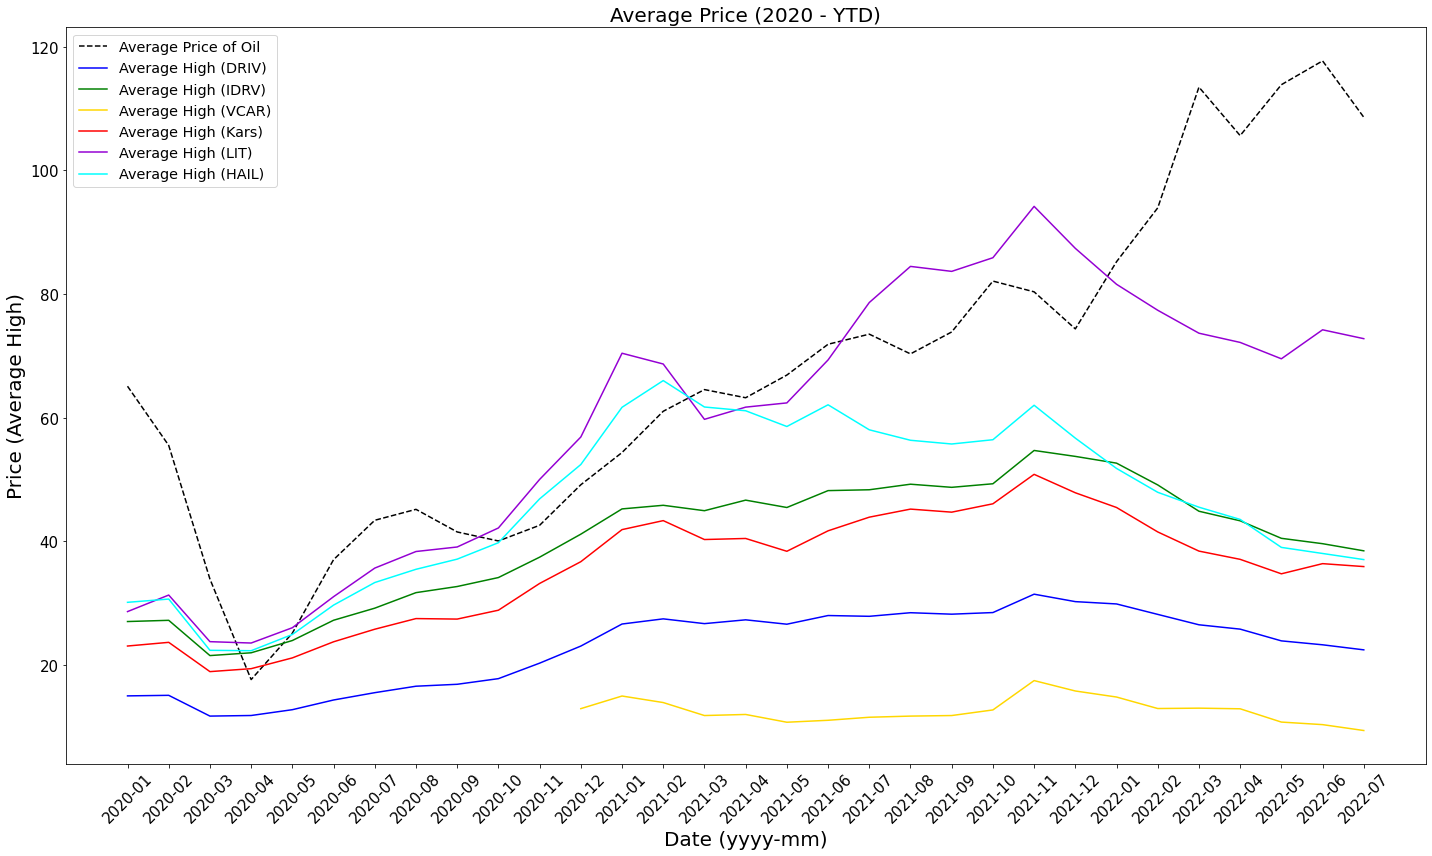

In [9]:
# Multi Line plot 
# ETF lines are Average High
# oil Line is Average Price of Oil
# x value is Dates from reduced oil

plt.figure(figsize=(20, 12))

x_value = reduced_oil['Date']

# Oil Line
# y
y_oil = reduced_oil['Average Price of Oil']
oil_lin, = plt.plot(x_value, y_oil, 'k--', label='Average Price of Oil')

# DRIV Line
# y
y_driv = driv['Average High']
driv_lin, = plt.plot(x_value, y_driv, color='blue', label='Average High (DRIV)')

# IDRV Line
# y
y_idrv = idrv['Average High']
idrv_lin, = plt.plot(x_value, y_idrv, color='green', label='Average High (IDRV)')

# KARS Line
# y
y_kars = kars['Average High']
kars_lin, = plt.plot(x_value, y_kars, color='red', label='Average High (Kars)')

# VCAR Line 
# x
x_vcar = vcar['Date']
# y 
y_vcar = vcar['Average High']
vcar_lin, = plt.plot(x_vcar, y_vcar, color='gold', label='Average High (VCAR)')

# LIT line
# y
y_lit = lit['Average High']
lit_lin, = plt.plot(x_value, y_lit, color='darkviolet', label='Average High (LIT)')

# HAIL Line
# y
y_hail = hail['Average High']
hail_lin, = plt.plot(x_value, y_hail, color='cyan', label='Average High (HAIL)')

# Legend
plt.legend(handles=[oil_lin, driv_lin, idrv_lin, vcar_lin, kars_lin, lit_lin, hail_lin], loc='best', fontsize='x-large')

# ticks
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

# title and labels
plt.title('Average Price (2020 - YTD)', fontsize=20)
plt.xlabel('Date (yyyy-mm)', fontsize=20)
plt.ylabel('Price (Average High)', fontsize=20)

plt.tight_layout()
plt.savefig('Images/multiplot_avg_high.png')
plt.show()

In [10]:
df_corr = merged_df.corr()
df_corr.unstack().sort_values()

Average Price of Oil           High (Percent Change)           -0.197991
High (Percent Change)          Average Price of Oil            -0.197991
Volume (Percent Change)        Price of Oil (Percent Change)   -0.049737
Price of Oil (Percent Change)  Volume (Percent Change)         -0.049737
Average High                   Volume (Percent Change)         -0.037271
Volume (Percent Change)        Average High                    -0.037271
                               Average Volume                  -0.032712
Average Volume                 Volume (Percent Change)         -0.032712
Average Price of Oil           Average Volume                  -0.023655
Average Volume                 Average Price of Oil            -0.023655
Average Price of Oil           Price of Oil (Percent Change)   -0.009814
Price of Oil (Percent Change)  Average Price of Oil            -0.009814
Average Price of Oil           Volume (Percent Change)         -0.003349
Volume (Percent Change)        Average Price of Oil

In [11]:
# Correlation Matrix ?

# filter merged_df by ETF using .loc

driv_df = merged_df.loc[merged_df['ETF'] == 'DRIV']
idrv_df = merged_df.loc[merged_df['ETF'] == 'IDRV']
kars_df = merged_df.loc[merged_df['ETF'] == 'KARS']
vcar_df = merged_df.loc[merged_df['ETF'] == 'VCAR']
hail_df = merged_df.loc[merged_df['ETF'] == 'HAIL']
lit_df = merged_df.loc[merged_df['ETF'] == 'LIT']

In [30]:
#DRIV
# .corr()

driv_corr = driv.corr()
driv_corr.unstack().sort_values()

Average Price of Oil           High (Percent Change)           -0.282057
High (Percent Change)          Average Price of Oil            -0.282057
Average Price of Oil           Volume (Percent Change)         -0.115285
Volume (Percent Change)        Average Price of Oil            -0.115285
Average High                   Volume (Percent Change)         -0.091399
Volume (Percent Change)        Average High                    -0.091399
Average Price of Oil           Price of Oil (Percent Change)    0.003001
Price of Oil (Percent Change)  Average Price of Oil             0.003001
Average High                   High (Percent Change)            0.009853
High (Percent Change)          Average High                     0.009853
Volume (Percent Change)        Price of Oil (Percent Change)    0.064078
Price of Oil (Percent Change)  Volume (Percent Change)          0.064078
Volume (Percent Change)        Average Volume                   0.092481
Average Volume                 Volume (Percent Chan

In [31]:
# correlation matrix
driv_corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,Average High,High (Percent Change),Average Volume,Volume (Percent Change),Average Price of Oil,Price of Oil (Percent Change)
Average High,1.000000,0.009853,0.638764,-0.091399,0.643681,0.148742
High (Percent Change),0.009853,1.000000,0.204858,0.239172,-0.282057,0.338471
Average Volume,0.638764,0.204858,1.000000,0.092481,0.194473,0.138190
Volume (Percent Change),-0.091399,0.239172,0.092481,1.000000,-0.115285,0.064078
Average Price of Oil,0.643681,-0.282057,0.194473,-0.115285,1.000000,0.003001
Price of Oil (Percent Change),0.148742,0.338471,0.138190,0.064078,0.003001,1.000000


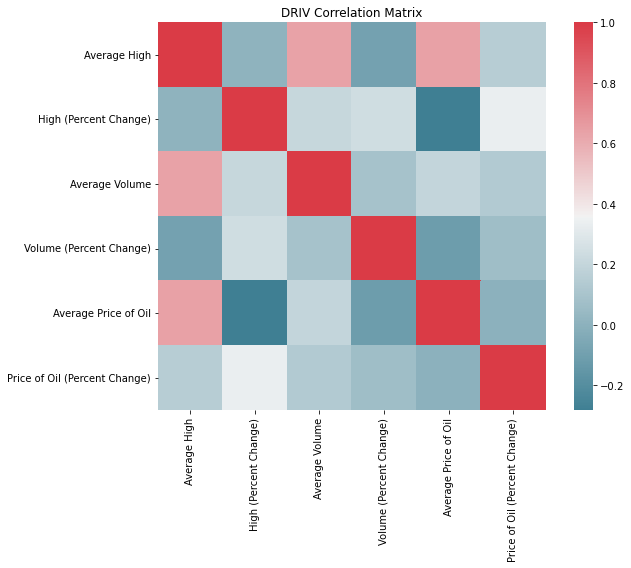

In [32]:
# Using Seaborn to make better corr matrix

a, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(driv_corr, mask=np.zeros_like(driv_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('DRIV Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/DRIV_corr.png')

In [28]:
# IDRV
idrv_corr = idrv.corr()
idrv_corr.unstack().sort_values()

Average Price of Oil           High (Percent Change)           -0.319685
High (Percent Change)          Average Price of Oil            -0.319685
Average Price of Oil           Volume (Percent Change)         -0.149223
Volume (Percent Change)        Average Price of Oil            -0.149223
Average High                   Volume (Percent Change)         -0.121891
Volume (Percent Change)        Average High                    -0.121891
                               Price of Oil (Percent Change)   -0.031548
Price of Oil (Percent Change)  Volume (Percent Change)         -0.031548
Volume (Percent Change)        Average Volume                  -0.005312
Average Volume                 Volume (Percent Change)         -0.005312
Average Price of Oil           Price of Oil (Percent Change)    0.003001
Price of Oil (Percent Change)  Average Price of Oil             0.003001
Average High                   High (Percent Change)            0.007144
High (Percent Change)          Average High        

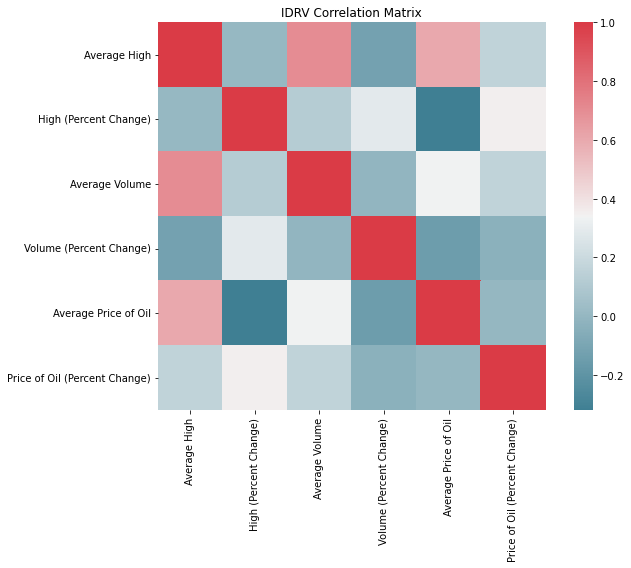

In [29]:
b, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(idrv_corr, mask=np.zeros_like(idrv_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('IDRV Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/IDRV_corr.png')

In [26]:
# kars
kars_corr = kars.corr()
kars_corr.unstack().sort_values()

Volume (Percent Change)        Price of Oil (Percent Change)   -0.423134
Price of Oil (Percent Change)  Volume (Percent Change)         -0.423134
Average High                   Volume (Percent Change)         -0.332035
Volume (Percent Change)        Average High                    -0.332035
Average Price of Oil           Volume (Percent Change)         -0.289427
Volume (Percent Change)        Average Price of Oil            -0.289427
Average Price of Oil           High (Percent Change)           -0.250219
High (Percent Change)          Average Price of Oil            -0.250219
Volume (Percent Change)        Average Volume                  -0.174907
Average Volume                 Volume (Percent Change)         -0.174907
High (Percent Change)          Average Volume                  -0.021469
Average Volume                 High (Percent Change)           -0.021469
Average High                   High (Percent Change)           -0.009066
High (Percent Change)          Average High        

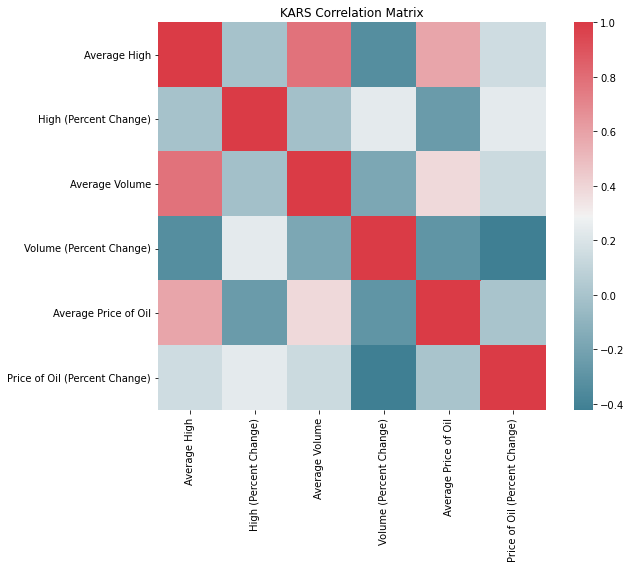

In [27]:
c, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kars_corr, mask=np.zeros_like(kars_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('KARS Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/KARS_corr.png')

In [25]:
hail_corr = hail.corr()
hail_corr.unstack().sort_values()

Average Price of Oil           High (Percent Change)           -0.331634
High (Percent Change)          Average Price of Oil            -0.331634
Average High                   Volume (Percent Change)         -0.283126
Volume (Percent Change)        Average High                    -0.283126
Average Price of Oil           Volume (Percent Change)         -0.194385
Volume (Percent Change)        Average Price of Oil            -0.194385
Price of Oil (Percent Change)  Volume (Percent Change)         -0.185093
Volume (Percent Change)        Price of Oil (Percent Change)   -0.185093
Average Volume                 Volume (Percent Change)         -0.093537
Volume (Percent Change)        Average Volume                  -0.093537
Average Price of Oil           Average Volume                  -0.091540
Average Volume                 Average Price of Oil            -0.091540
Average Price of Oil           Price of Oil (Percent Change)    0.003001
Price of Oil (Percent Change)  Average Price of Oil

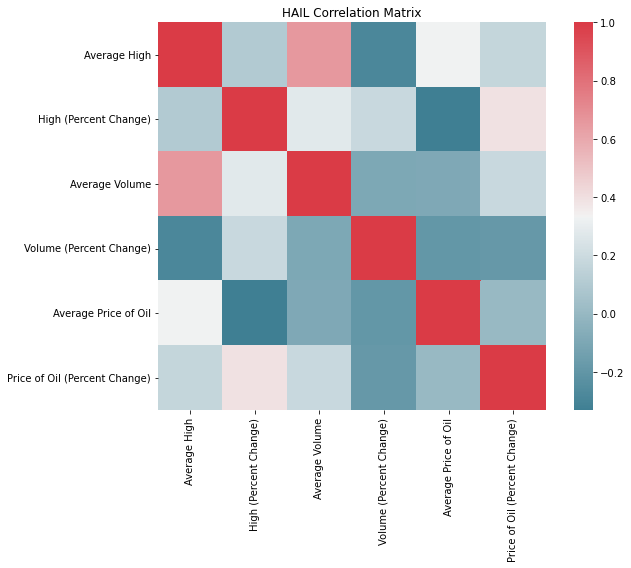

In [33]:
d, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(hail_corr, mask=np.zeros_like(hail_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('HAIL Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/HAIL_corr.png')

In [34]:
lit_corr = lit.corr()
lit_corr.unstack().sort_values()

Average Price of Oil           High (Percent Change)           -0.220039
High (Percent Change)          Average Price of Oil            -0.220039
Average High                   High (Percent Change)           -0.067609
High (Percent Change)          Average High                    -0.067609
Average Price of Oil           Volume (Percent Change)         -0.052905
Volume (Percent Change)        Average Price of Oil            -0.052905
                               Price of Oil (Percent Change)   -0.040239
Price of Oil (Percent Change)  Volume (Percent Change)         -0.040239
Average High                   Volume (Percent Change)         -0.002426
Volume (Percent Change)        Average High                    -0.002426
Average Price of Oil           Price of Oil (Percent Change)    0.003001
Price of Oil (Percent Change)  Average Price of Oil             0.003001
Average Volume                 Price of Oil (Percent Change)    0.091429
Price of Oil (Percent Change)  Average Volume      

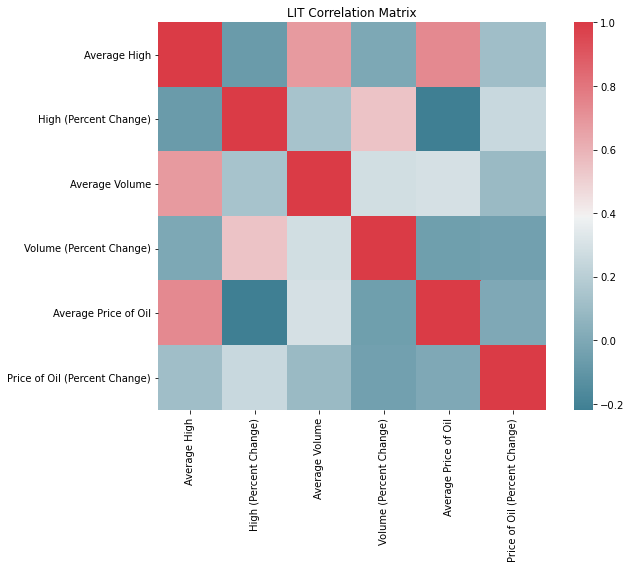

In [35]:
e, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(lit_corr, mask=np.zeros_like(lit_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('LIT Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/LIT_corr.png')

In [36]:
vcar_corr = vcar.corr()
vcar_corr.unstack().sort_values()

Volume (Percent Change)        Price of Oil (Percent Change)   -0.572570
Price of Oil (Percent Change)  Volume (Percent Change)         -0.572570
                               High (Percent Change)           -0.449463
High (Percent Change)          Price of Oil (Percent Change)   -0.449463
Average Price of Oil           Average High                    -0.297444
Average High                   Average Price of Oil            -0.297444
Average Price of Oil           High (Percent Change)           -0.259256
High (Percent Change)          Average Price of Oil            -0.259256
Average Volume                 Price of Oil (Percent Change)   -0.257959
Price of Oil (Percent Change)  Average Volume                  -0.257959
Average Price of Oil           Price of Oil (Percent Change)   -0.142312
Price of Oil (Percent Change)  Average Price of Oil            -0.142312
Average Price of Oil           Average Volume                  -0.126553
Average Volume                 Average Price of Oil

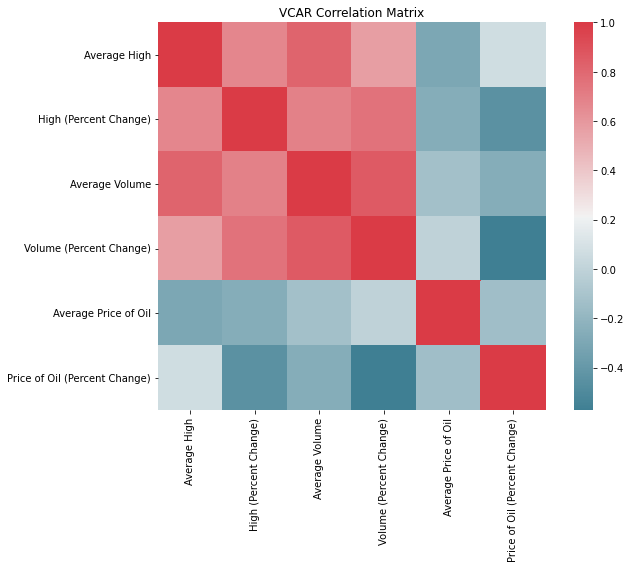

In [39]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(vcar_corr, mask=np.zeros_like(vcar_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# add title and save
plt.title('VCAR Correlation Matrix')
plt.tight_layout()
plt.savefig('Images/VCAR_corr.png')